In [106]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
#%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [137]:
bank_data= pd.read_csv('https://raw.githubusercontent.com/IndreBZ/bank/716b7cd2a11db98dc4175a8ccce927869caca041/bank2.csv')
print("The first 5 rows of the bank data") 
bank_data.head()



The first 5 rows of the bank data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [108]:
bank_data.shape

(45211, 17)

In [109]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [110]:
##find missing values
print('Find if there are missed values in data set')
missing_data = bank_data.isnull()
missing_data.head(5)
## no missing values

Find if there are missed values in data set


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [111]:
##DATA MANIPULATION TASK
#1. select random subsample of data set
print('random subsample of data set')
sample = bank_data.sample(frac=0.5, replace=False, random_state=1)
print('50% sample of data set')
print(sample.shape)


random subsample of data set
50% sample of data set
(22606, 17)


In [129]:
#2. filter desired rows using simple and more complex conditions;
df = bank_data
print("how many clients aged(30-50) subscribed a term deposit?")
age_df = df[(df["age"] > 30) & (df["age"] < 50) & (df["y"] == "yes")]
print(age_df.shape)
print("how many clients aged(30-50) didn't subscribe a term deposit?")
age_df1 = df[(df["age"] > 30) & (df["age"] < 50) & (df["y"] == "no")]
print(age_df1.shape)
print("group by job and term deposit and calculate sum of balance. Filter jobs where balance > average")
job_result_grouped = df.groupby(["y", "job"]).agg({"balance": "sum"})
balance =job_result_grouped ["balance"].mean()
print("Balance average",balance)
job_result = job_result_grouped[(job_result_grouped["balance"] > balance)]
print(job_result)
    

how many clients aged(30-50) subscribed a term deposit?
(2759, 17)
how many clients aged(30-50) didn't subscribe a term deposit?
(25228, 17)
group by job and term deposit and calculate sum of balance. Filter jobs where balance > average
Balance average 2566236.75
                  balance
y   job                  
no  admin.        4966497
    blue-collar   9596143
    management   13895227
    retired       3103899
    services      3731449
    technician    7972198
yes management    2785061


In [130]:
#3. drop unnecessary variables, rename some variables
#unnecessary(guess) variables could be related with the last contact of the current campaign
df.drop(["contact", "day","month","duration"], axis=1, inplace=True)
print('rename some variables')
df.rename(columns={'campaign':'num_of_contact'}, inplace=True)
df.rename(columns={'pdays':'num_of_days'}, inplace=True)
df.head()

rename some variables


,age,job,marital,education,default,balance,housing,loan,num_of_contact,num_of_days,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,1,-1,0,unknown,no


In [114]:
#4. calculate summarizing statistics (for full sample and by categorical variables as well)
#print(bank_data.dtypes)
print(bank_data.describe())##original dataset
print(bank_data.info())


                age        balance  num_of_contact   num_of_days      previous
count  45211.000000   45211.000000    45211.000000  45211.000000  45211.000000
mean      40.936210    1362.272058        2.763841     40.197828      0.580323
std       10.618762    3044.765829        3.098021    100.128746      2.303441
min       18.000000   -8019.000000        1.000000     -1.000000      0.000000
25%       33.000000      72.000000        1.000000     -1.000000      0.000000
50%       39.000000     448.000000        2.000000     -1.000000      0.000000
75%       48.000000    1428.000000        3.000000     -1.000000      0.000000
max       95.000000  102127.000000       63.000000    871.000000    275.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2  

In [131]:
#summarizing statistics only for not categorical variables
df.describe()## updated dataset

,age,balance,num_of_contact,num_of_days,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,40.197828,0.580323
std,10.618762,3044.765829,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,871.000000,275.000000


In [134]:

#5. create new variables using simple transformation and custom functions
print('change categorical columns to numeric')
df['y'].replace(['no', 'yes'],[0, 1], inplace=True)
df['job'].replace(["admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['marital'].replace(["married","divorced","single"],[0, 1,2], inplace=True)
df['education'].replace(["unknown","secondary","primary","tertiary"],[0,1,2,3], inplace=True)
df['default'].replace(['no', 'yes'],[0, 1], inplace=True)
df['housing'].replace(['no', 'yes'],[0, 1], inplace=True)
df['loan'].replace(['no', 'yes'],[0, 1], inplace=True)
df['poutcome'].replace(["unknown","other","failure","success"],[0,1,2,3], inplace=True)

change categorical columns to numeric


In [133]:
print("Change column data type")
#look into updated data types and summarizing statistics for new dataset df
print(df.dtypes)
print(df.describe())

Change column data type
age               int64
job               int64
marital           int64
education         int64
default           int64
balance           int64
housing           int64
loan              int64
num_of_contact    int64
num_of_days       int64
previous          int64
poutcome          int64
y                 int64
dtype: object
                age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210      6.018159      0.680963      1.698856      0.018027   
std       10.618762      3.543218      0.884908      0.938627      0.133049   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      3.000000      0.000000      1.000000      0.000000   
50%       39.000000      7.000000      0.000000      1.000000      0.000000   
75%       48.000000     10.000000      2.000000      3.000000      0.000000   
max       95.00000

In [118]:
#6. order data set by several variables.
#df['job'].value_counts()

sorted_balance = df.sort_values(by=['balance'], ascending=True)
print(sorted_balance.head(3))
sorted_age = df.sort_values(by=['age'], ascending=False)
print(sorted_age.head(3)) 
sorted_job_educational = df.sort_values(by=['job','education'], ascending=True)
print(sorted_job_educational.head(5))

       age  job  marital  education  default  balance  housing  loan  \
12909   26    7        2          1        1    -8019        0     1   
15682   49    3        0          3        1    -6847        0     1   
38736   60    3        1          3        0    -4057        1     0   

       num_of_contact  num_of_days  previous  poutcome  y  
12909               3           -1         0         0  0  
15682               1           -1         0         0  0  
38736               6           -1         0         0  0  
       age  job  marital  education  default  balance  housing  loan  \
41663   95    9        0          1        0        0        0     0   
33699   95    9        1          2        0     2282        0     0   
31233   94    9        1          1        0     1234        0     0   

       num_of_contact  num_of_days  previous  poutcome  y  
41663               1           -1         0         0  0  
33699              17           -1         0         0  1  
31

In [135]:
##DATA VISUALISATION TASK
## try to find relations between variables
df.corr()
## correlations are very small

,age,job,marital,education,default,balance,housing,loan,num_of_contact,num_of_days,previous,poutcome,y
age,1.000000,0.044237,-0.376104,-0.019044,-0.017879,0.097783,-0.185513,-0.015655,0.004760,-0.023758,0.001288,0.014363,0.025155
job,0.044237,1.000000,-0.034681,-0.209193,0.002825,-0.030025,0.035074,0.026080,0.010301,-0.008086,-0.016064,-0.022410,-0.024649
marital,-0.376104,-0.034681,1.000000,0.048662,0.009584,-0.020602,-0.020202,-0.046738,-0.029121,0.029490,0.015676,0.027295,0.065668
education,-0.019044,-0.209193,0.048662,1.000000,-0.013916,0.073295,-0.082156,-0.038771,0.014960,-0.012525,0.017587,0.022000,0.046539
default,-0.017879,0.002825,0.009584,-0.013916,1.000000,-0.066745,-0.006025,0.077234,0.016822,-0.029979,-0.018329,-0.039593,-0.022419
balance,0.097783,-0.030025,-0.020602,0.073295,-0.066745,1.000000,-0.068768,-0.084350,-0.014578,0.003435,0.016674,0.034865,0.052838
housing,-0.185513,0.035074,-0.020202,-0.082156,-0.006025,-0.068768,1.000000,0.041323,-0.023599,0.124178,0.037076,0.031062,-0.139173
loan,-0.015655,0.026080,-0.046738,-0.038771,0.077234,-0.084350,0.041323,1.000000,0.009980,-0.022754,-0.011043,-0.039928,-0.068185
num_of_contact,0.004760,0.010301,-0.029121,0.014960,0.016822,-0.014578,-0.023599,0.009980,1.000000,-0.088628,-0.032855,-0.111592,-0.073172
num_of_days,-0.023758,-0.008086,0.029490,-0.012525,-0.029979,0.003435,0.124178,-0.022754,-0.088628,1.000000,0.454820,0.790806,0.103621


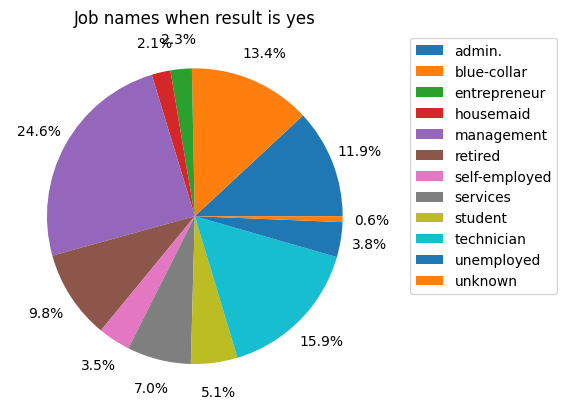

In [138]:
##Pie
bank_data_yes =bank_data[(bank_data["y"] == "yes")]
#bank_data.head()
df_job = bank_data_yes.groupby(['job'])['y'].count().reset_index()
#df_job
label =list(df_job['job'])
label
#df_job['y']
#Pie on jobs 
fig,ax=plt.subplots()
ax.pie(df_job['y'],autopct='%1.1f%%', pctdistance=1.2) #using explode to highlight the lowest 
ax.set_aspect('equal')  # Ensure pie is drawn as a circle
plt.title('Job names when result is yes')
ax.legend(df_job['job'],bbox_to_anchor=(1, 0, 0.5, 1))#, include legend, if you donot want to pass the labels
plt.show()





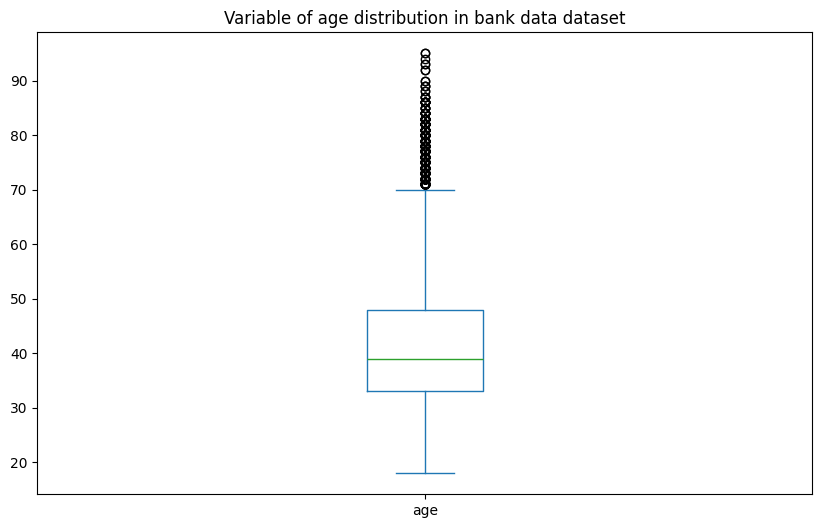

In [121]:
df_age = df[['age']]
df_age.plot(kind='box', figsize=(10, 6))
plt.title('Variable of age distribution in bank data dataset')
plt.show()

c:\Users\s7149b\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


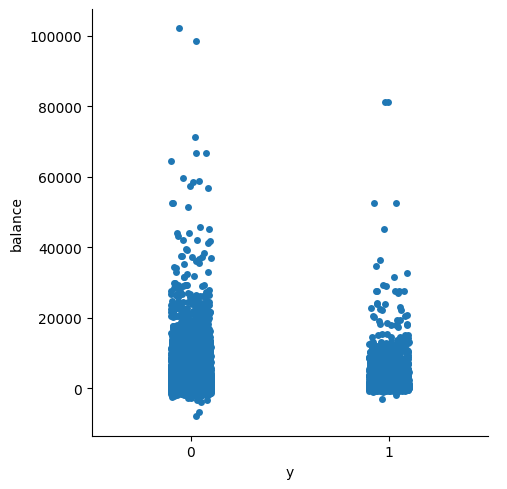

In [140]:
sns.catplot(x = 'y', y = 'balance', data = df)

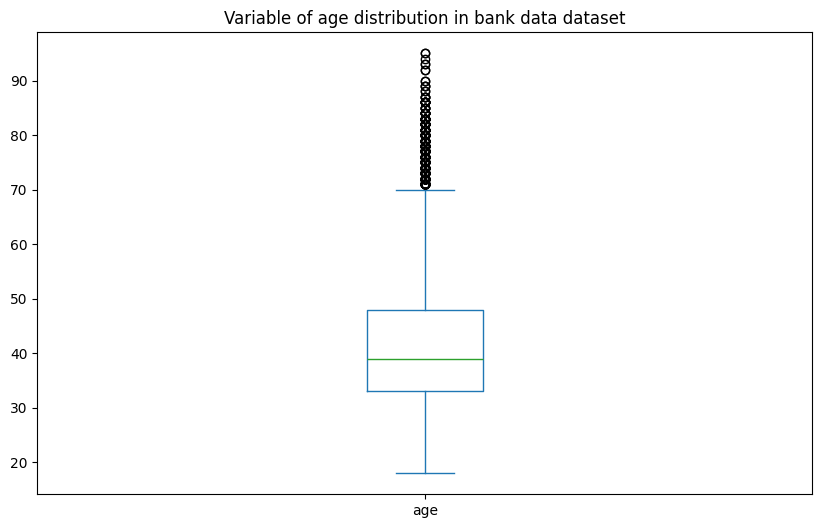

In [124]:
boundary = 2
sns.scatterplot(x = 'balance', y = 'y', data = df)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 6)

In [141]:
#MODELLING TASK
#logistic regression
df.head()
#the first model
#define x(dependent variable) and y(independent variable) of dataset
x = np.asarray(df[['age','job','marital','education','default','balance','housing','loan','num_of_contact','num_of_days','previous','poutcome']])
print('x',x[0:5])
y = np.asarray(df['y'])
print('y',y[0:5])

x [[  58    3    0    3    0 2143    1    0    1   -1    0    0]
 [  44   10    2    1    0   29    1    0    1   -1    0    0]
 [  33    5    0    1    0    2    1    1    1   -1    0    0]
 [  47    7    0    0    0 1506    1    0    1   -1    0    0]
 [  33    1    2    0    0    1    0    0    1   -1    0    0]]
y [0 0 0 0 0]


In [142]:
#normalize the dataset
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 1.60696496, -0.8518225 , -0.76953816,  1.38623556, -0.13548989,
         0.25641925,  0.89391541, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [ 0.28852927,  1.12380467,  1.49060994, -0.7445602 , -0.13548989,
        -0.43789469,  0.89391541, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [-0.74738448, -0.2873576 , -0.76953816, -0.7445602 , -0.13548989,
        -0.44676247,  0.89391541,  2.2893591 , -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [ 0.5710512 ,  0.27710731, -0.76953816, -1.80995809, -0.13548989,
         0.04720545,  0.89391541, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [-0.74738448, -1.41628741,  1.49060994, -1.80995809, -0.13548989,
        -0.44709091, -1.11867408, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786]])

In [144]:
##Define train and test sets
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=5)## worse result with test_size=0.2
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (31647, 12) (31647,)
Test set: (13564, 12) (13564,)


In [145]:
#Define logistic regression model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [146]:
yhat = LR.predict(x_test)
yhat

array([[ 1.60696496, -0.8518225 , -0.76953816,  1.38623556, -0.13548989,
         0.25641925,  0.89391541, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [ 0.28852927,  1.12380467,  1.49060994, -0.7445602 , -0.13548989,
        -0.43789469,  0.89391541, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [-0.74738448, -0.2873576 , -0.76953816, -0.7445602 , -0.13548989,
        -0.44676247,  0.89391541,  2.2893591 , -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [ 0.5710512 ,  0.27710731, -0.76953816, -1.80995809, -0.13548989,
         0.04720545,  0.89391541, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786],
       [-0.74738448, -1.41628741,  1.49060994, -1.80995809, -0.13548989,
        -0.44709091, -1.11867408, -0.43680347, -0.56935064, -0.41145311,
        -0.25194037, -0.44474786]])

In [147]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob


x [[  58    3    0    3    0 2143    1    0    1   -1    0    0]
 [  44   10    2    1    0   29    1    0    1   -1    0    0]
 [  33    5    0    1    0    2    1    1    1   -1    0    0]
 [  47    7    0    0    0 1506    1    0    1   -1    0    0]
 [  33    1    2    0    0    1    0    0    1   -1    0    0]]
y [0 0 0 0 0]


In [154]:
#jaccard index: for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.
jaccard_score(y_test, yhat,pos_label=0)

0.8880256965713005

In [155]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  177  1422]
 [   77 11888]]


Confusion matrix, without normalization
[[  177  1422]
 [   77 11888]]


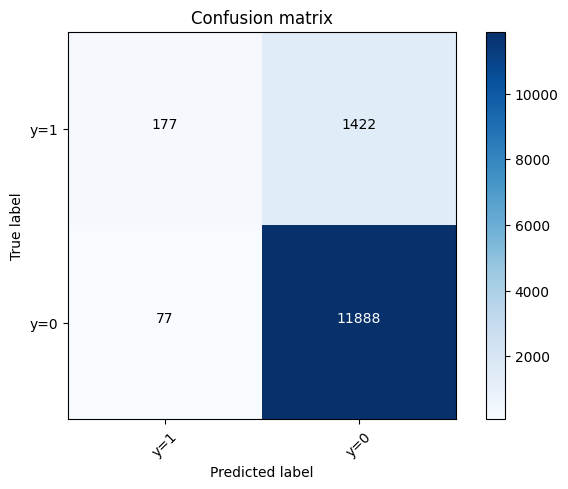

In [158]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=1','y=0'],normalize= False,  title='Confusion matrix')

In [162]:
print (classification_report(y_test, yhat))
##model predict y = 0 94% correct but only  19% for y=1

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11965
           1       0.70      0.11      0.19      1599

    accuracy                           0.89     13564
   macro avg       0.80      0.55      0.57     13564
weighted avg       0.87      0.89      0.85     13564



In [164]:
###the second model
xx = np.asarray(df[['age','job','education','marital','default','housing','balance','loan']])
yy = np.asarray(df['y'])
xx = preprocessing.StandardScaler().fit(xx).transform(xx)
xx_train, xx_test, yy_train, yy_test = train_test_split( xx, yy, test_size=0.2, random_state=5)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(xx_train,yy_train)
yyhat = LR.predict(xx_test)
yyhat_prob = LR.predict_proba(xx_test)
jaccard_score(yy_test, yyhat,pos_label=0)

0.8843176288431763

Confusion matrix, without normalization
[[   1 1045]
 [   1 7996]]


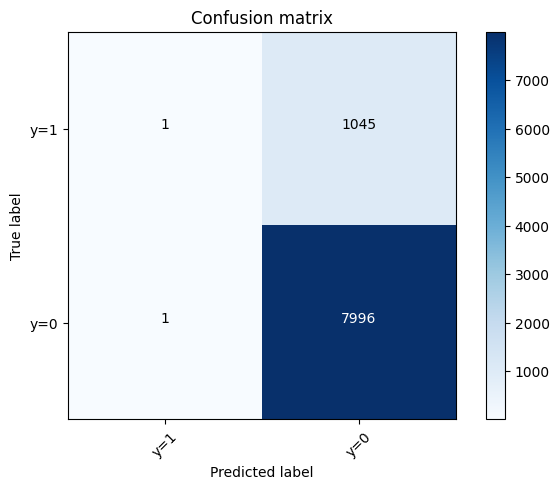

In [ ]:
cnf_matrix = confusion_matrix(yy_test, yyhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=1','y=0'],normalize= False,  title='Confusion matrix')
## in almost all cases model predict Y = 0, not good

In [166]:
print (classification_report(yy_test, yyhat))
## results are much worse than the first model

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7997
           1       0.50      0.00      0.00      1046

    accuracy                           0.88      9043
   macro avg       0.69      0.50      0.47      9043
weighted avg       0.84      0.88      0.83      9043



In [ ]:
##with more variables model predict more accurate

In [168]:
##The third model
df_LR_new = bank_data
print('change categorical columns to numeric')
df_LR_new['y'].replace(['no', 'yes'],[0, 1], inplace=True)
df_LR_new['job'].replace(["admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df_LR_new['marital'].replace(["married","divorced","single"],[0, 1,2], inplace=True)
df_LR_new['education'].replace(["unknown","secondary","primary","tertiary"],[0,1,2,3], inplace=True)
df_LR_new['default'].replace(['no', 'yes'],[0, 1], inplace=True)
df_LR_new['housing'].replace(['no', 'yes'],[0, 1], inplace=True)
df_LR_new['loan'].replace(['no', 'yes'],[0, 1], inplace=True)
df_LR_new['contact'].replace(['unknown','telephone','cellular'],[0, 1,2], inplace=True)
df_LR_new['month'].replace(['jan', 'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[0, 1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df_LR_new['poutcome'].replace(["unknown","other","failure","success"],[0,1,2,3], inplace=True)
print("Change column data type")
df_LR_new.dtypes

change categorical columns to numeric
Change column data type


age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [170]:
df_LR_new.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.044237,-0.376104,-0.019044,-0.017879,0.097783,-0.185513,-0.015655,-0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.014363,0.025155
job,0.044237,1.000000,-0.034681,-0.209193,0.002825,-0.030025,0.035074,0.026080,-0.039296,0.008361,-0.010099,0.012426,0.010301,-0.008086,-0.016064,-0.022410,-0.024649
marital,-0.376104,-0.034681,1.000000,0.048662,0.009584,-0.020602,-0.020202,-0.046738,0.040757,-0.007701,-0.069718,0.022895,-0.029121,0.029490,0.015676,0.027295,0.065668
education,-0.019044,-0.209193,0.048662,1.000000,-0.013916,0.073295,-0.082156,-0.038771,0.108624,0.013607,0.072804,-0.000389,0.014960,-0.012525,0.017587,0.022000,0.046539
default,-0.017879,0.002825,0.009584,-0.013916,1.000000,-0.066745,-0.006025,0.077234,-0.015404,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.039593,-0.022419
balance,0.097783,-0.030025,-0.020602,0.073295,-0.066745,1.000000,-0.068768,-0.084350,0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.034865,0.052838
housing,-0.185513,0.035074,-0.020202,-0.082156,-0.006025,-0.068768,1.000000,0.041323,-0.188123,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,0.031062,-0.139173
loan,-0.015655,0.026080,-0.046738,-0.038771,0.077234,-0.084350,0.041323,1.000000,0.010873,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.039928,-0.068185
contact,-0.026221,-0.039296,0.040757,0.108624,-0.015404,0.027273,-0.188123,0.010873,1.000000,0.027936,0.173779,0.020839,-0.019614,0.244816,0.147811,0.272710,0.148395
day,-0.009120,0.008361,-0.007701,0.013607,0.009424,0.004503,-0.027982,0.011370,0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.081519,-0.028348


In [171]:
xxx = np.asarray(df_LR_new[['age','job','education','marital','default','housing','balance','loan','contact','duration']])## added duration which was deleted in the df dataset
yyy = np.asarray(df_LR_new['y'])
xxx = preprocessing.StandardScaler().fit(xxx).transform(xxx)
xxx_train, xxx_test, yyy_train, yyy_test = train_test_split( xxx, yyy, test_size=0.2, random_state=5)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(xxx_train,yyy_train)
yyyhat = LR.predict(xxx_test)
yyyhat_prob = LR.predict_proba(xxx_test)
jaccard_score(yyy_test, yyyhat,pos_label=0)

0.8910756701730573

Confusion matrix, without normalization
[[ 202  844]
 [ 119 7878]]


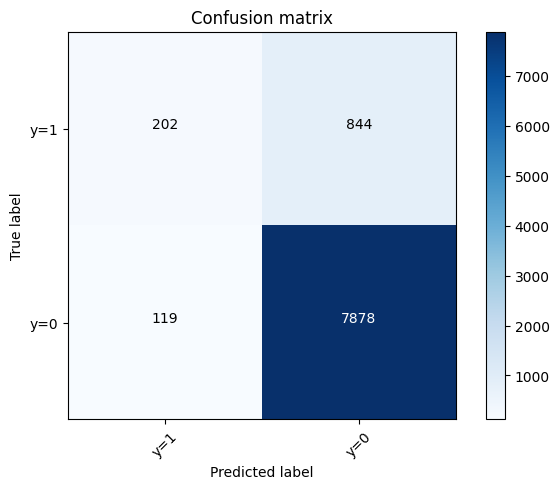

In [173]:
cnf_matrix = confusion_matrix(yyy_test, yyyhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=1','y=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(yyy_test, yyyhat))
## the best model evaluation: reason add variable duration which has bigger correlation coefficient

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7997
           1       0.63      0.19      0.30      1046

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043

